In [72]:
import os

path, dirs, files = next(os.walk('train'))

print("There is")
print(len(files))
print("files")

There is
25000
files


In [73]:
file_names = os.listdir('train')[:2000]
print(file_names[0])

dog.8011.jpg


In [74]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

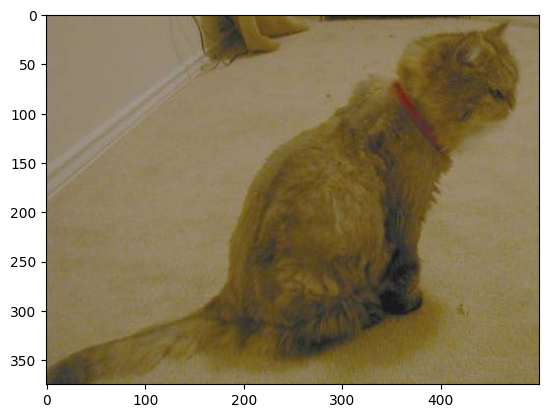

In [75]:
cat = mpimg.imread('train/cat.10145.jpg')
plt.imshow(cat)
plt.show()

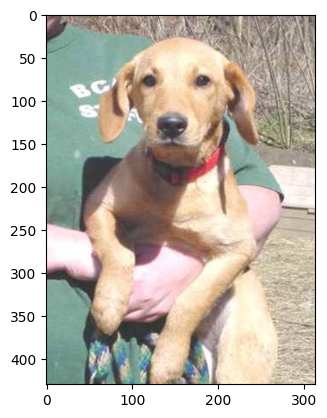

In [76]:
dog = mpimg.imread('train/dog.10145.jpg')
plt.imshow(dog)
plt.show()

In [77]:
dog_files = []
cat_files = []

labels = []

for file_name in file_names:
    if file_name.startswith('cat'):
        cat_files.append(file_name)

        labels.append(0)
    elif file_name.startswith('dog'):
        dog_files.append(file_name)

        labels.append(1)

print(len(dog_files))
print(len(cat_files))

1014
986


In [78]:
import PIL

for file_name in file_names:
    img = PIL.Image.open('train/' + file_name)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    img.save('resized/' + file_name)

In [79]:
import cv2
import glob
import numpy as np

dog_cat_images = []

for file_name in file_names:
    dog_cat_images.append(cv2.imread('resized/' + file_name))

dog_cat_images = np.asarray(dog_cat_images)

In [80]:
from sklearn.model_selection import train_test_split

labels = np.asarray(labels)

X_train, X_test, Y_train, Y_test = train_test_split(dog_cat_images, labels, test_size=0.2, random_state=2)

X_train_scaled = X_train/225

X_test_scaled = X_test/255



In [81]:
import tensorflow as tf
import tensorflow_hub as hub 

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [82]:
model = tf.keras.Sequential([
    pretrained_model, 
    tf.keras.layers.Dense(2)
])

model.summary()

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

model.fit(X_train_scaled, Y_train, epochs=5)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/5
50/50 [==============================] - 10s 149ms/step - loss: 0.2229 - acc: 0.9019
Epoch 2/5
50/50 [==============================] - 7s 140ms/step - loss: 0.0787 - acc: 0.9744
Epoch 3/5
50/50 [==============================] - 7s 141ms/step - loss: 0.0642 - acc: 0.9819
Epoch 4/5
50/50 [==============================] - 8s 153ms/step - loss: 0.0485 - acc: 0.9856
Epoch 5/5
50/50 [==============================] - 7s 140ms

In [83]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =',score)
print('Test Accuracy =', acc)

13/13 [==============================] - 2s 141ms/step - loss: 0.0559 - acc: 0.9800
Test Loss = 0.05594757944345474
Test Accuracy = 0.9800000190734863


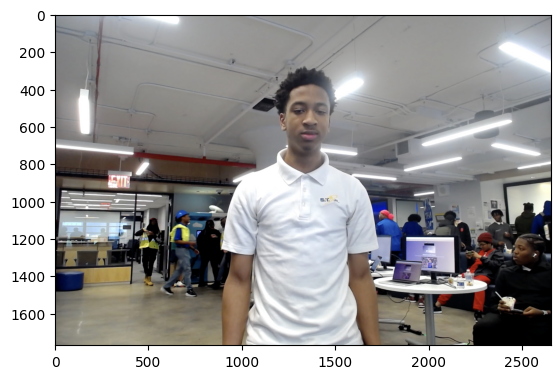

In [182]:
test_image = int(input("Give me a number between 1 and 12500"))

user_image = mpimg.imread('test1 2/{}.jpg'.format(test_image))
plt.imshow(user_image)
plt.show()

In [183]:
input_image = cv2.imread(f'test1 2/{test_image}.jpg')

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/225

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

1/1 [==============================] - 0s 37ms/step
[[-0.6111303   0.40046543]]


In [184]:
cat_or_dog = np.argmax(input_prediction)

print(cat_or_dog)

if cat_or_dog == 0:
    print("🐱")

elif cat_or_dog ==1:
    print("🐶")

1
🐶
